In [ ]:
import pandas as pd

# Load the pickle file
pickle_file = "/content/gender_noun_dims.pickle"  # Update path if needed
data = pd.read_pickle(pickle_file)

# Convert dictionary to DataFrame if needed
if isinstance(data, dict):
    df = pd.DataFrame.from_dict(data, orient="index")
    df.reset_index(inplace=True)
    df.rename(columns={"index": "Feature"}, inplace=True)

# List of columns to drop (including the ones you specified)
columns_to_drop = [
    "ANOVA", "MI", "All non ind", "LR1", "Corr1", "All imp dims1",
    "LR5", "Corr5", "All imp dims5", "LR10", "Corr10", "All imp dims10",
    "LR25", "Corr25", "All imp dims25", "LR50", "Corr50", "All imp dims50",
    "LR75", "Corr75", "All imp dims75",
    # Your specified columns:
    "All dims", "All imp dims5", "LR10", "All imp dims50", "LR75"
]

# Drop columns if they exist
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors="ignore")

# Save cleaned DataFrame to CSV
csv_file = "/content/gender_noun_dims_1.csv"  # Update path if needed
df.to_csv(csv_file, index=False)

print(f"✅ Pickle file cleaned and converted to CSV: {csv_file}")


✅ Pickle file cleaned and converted to CSV: /content/gender_noun_dims_1.csv


In [ ]:
import pandas as pd
import re

# Load Ekaterina's stable dimensions
ekaterina_df = pd.read_csv("/content/gender_noun_dims_1.csv")



In [ ]:
ekaterina_df

,Feature,Perc1,Perc5,Perc10,Perc25,Perc50,Perc75
0,flau_small_c,"[[434, 316, 507, 245, 100], [434, 162, 245, 31...","[[434, 316, 507, 245, 100, 192, 377, 117, 186,...","[[434, 316, 507, 245, 100, 192, 377, 117, 186,...","[[434, 316, 507, 245, 100, 192, 377, 117, 186,...","[[434, 316, 507, 245, 100, 192, 377, 117, 186,...","[[434, 316, 507, 245, 100, 192, 377, 117, 186,..."
1,flau_base_u,"[[382, 433, 17, 508, 138, 735, 130], [382, 138...","[[382, 433, 17, 508, 138, 735, 130, 456, 662, ...","[[382, 433, 17, 508, 138, 735, 130, 456, 662, ...","[[382, 433, 17, 508, 138, 735, 130, 456, 662, ...","[[382, 433, 17, 508, 138, 735, 130, 456, 662, ...","[[382, 433, 17, 508, 138, 735, 130, 456, 662, ..."
2,flau_base_c,"[[209, 526, 71, 752, 70, 425, 130], [526, 749,...","[[209, 526, 71, 752, 70, 425, 130, 749, 398, 2...","[[209, 526, 71, 752, 70, 425, 130, 749, 398, 2...","[[209, 526, 71, 752, 70, 425, 130, 749, 398, 2...","[[209, 526, 71, 752, 70, 425, 130, 749, 398, 2...","[[209, 526, 71, 752, 70, 425, 130, 749, 398, 2..."
3,flau_large_c,"[[136, 182, 795, 972, 15, 575, 1016, 1022, 862...","[[136, 182, 795, 972, 15, 575, 1016, 1022, 862...","[[136, 182, 795, 972, 15, 575, 1016, 1022, 862...","[[136, 182, 795, 972, 15, 575, 1016, 1022, 862...","[[136, 182, 795, 972, 15, 575, 1016, 1022, 862...","[[136, 182, 795, 972, 15, 575, 1016, 1022, 862..."
4,cam_base,"[[685, 699, 75, 147, 173, 579, 368], [558, 702...","[[685, 699, 75, 147, 173, 579, 368, 568, 78, 1...","[[685, 699, 75, 147, 173, 579, 368, 568, 78, 1...","[[685, 699, 75, 147, 173, 579, 368, 568, 78, 1...","[[685, 699, 75, 147, 173, 579, 368, 568, 78, 1...","[[685, 699, 75, 147, 173, 579, 368, 568, 78, 1..."
5,xlm_large,"[[24, 638, 934, 849, 173, 939, 153, 136, 224, ...","[[24, 638, 934, 849, 173, 939, 153, 136, 224, ...","[[24, 638, 934, 849, 173, 939, 153, 136, 224, ...","[[24, 638, 934, 849, 173, 939, 153, 136, 224, ...","[[24, 638, 934, 849, 173, 939, 153, 136, 224, ...","[[24, 638, 934, 849, 173, 939, 153, 136, 224, ..."
6,xlm_base,"[[616, 175, 311, 307, 517, 114, 257], [70, 616...","[[616, 175, 311, 307, 517, 114, 257, 384, 43, ...","[[616, 175, 311, 307, 517, 114, 257, 384, 43, ...","[[616, 175, 311, 307, 517, 114, 257, 384, 43, ...","[[616, 175, 311, 307, 517, 114, 257, 384, 43, ...","[[616, 175, 311, 307, 517, 114, 257, 384, 43, ..."
7,bert_base_u,"[[565, 15, 412, 204, 11, 145, 515], [332, 758,...","[[565, 15, 412, 204, 11, 145, 515, 653, 385, 4...","[[565, 15, 412, 204, 11, 145, 515, 653, 385, 4...","[[565, 15, 412, 204, 11, 145, 515, 653, 385, 4...","[[565, 15, 412, 204, 11, 145, 515, 653, 385, 4...","[[565, 15, 412, 204, 11, 145, 515, 653, 385, 4..."
8,distilbert_base,"[[488, 727, 1, 51, 207, 76, 302], [727, 1, 270...","[[488, 727, 1, 51, 207, 76, 302, 394, 75, 301,...","[[488, 727, 1, 51, 207, 76, 302, 394, 75, 301,...","[[488, 727, 1, 51, 207, 76, 302, 394, 75, 301,...","[[488, 727, 1, 51, 207, 76, 302, 394, 75, 301,...","[[488, 727, 1, 51, 207, 76, 302, 394, 75, 301,..."
9,bert_base_c,"[[135, 742, 30, 548, 566, 270, 610], [721, 548...","[[135, 742, 30, 548, 566, 270, 610, 636, 332, ...","[[135, 742, 30, 548, 566, 270, 610, 636, 332, ...","[[135, 742, 30, 548, 566, 270, 610, 636, 332, ...","[[135, 742, 30, 548, 566, 270, 610, 636, 332, ...","[[135, 742, 30, 548, 566, 270, 610, 636, 332, ..."


In [ ]:
unique_features = ekaterina_df["Feature"].unique()
print(unique_features)


['flau_small_c' 'flau_base_u' 'flau_base_c' 'flau_large_c' 'cam_base'
 'xlm_large' 'xlm_base' 'bert_base_u' 'distilbert_base' 'bert_base_c']


In [ ]:
#PercX → Features chosen by Perceptron (Top X%)
ekaterina_df.columns

Index(['Feature', 'Perc1', 'Perc5', 'Perc10', 'Perc25', 'Perc50', 'Perc75'], dtype='object')

In [ ]:
ekaterina_df

,Feature,Perc1,Perc5,Perc10,Perc25,Perc50,Perc75
0,flau_small_c,"[[434, 316, 507, 245, 100], [434, 162, 245, 31...","[[434, 316, 507, 245, 100, 192, 377, 117, 186,...","[[434, 316, 507, 245, 100, 192, 377, 117, 186,...","[[434, 316, 507, 245, 100, 192, 377, 117, 186,...","[[434, 316, 507, 245, 100, 192, 377, 117, 186,...","[[434, 316, 507, 245, 100, 192, 377, 117, 186,..."
1,flau_base_u,"[[382, 433, 17, 508, 138, 735, 130], [382, 138...","[[382, 433, 17, 508, 138, 735, 130, 456, 662, ...","[[382, 433, 17, 508, 138, 735, 130, 456, 662, ...","[[382, 433, 17, 508, 138, 735, 130, 456, 662, ...","[[382, 433, 17, 508, 138, 735, 130, 456, 662, ...","[[382, 433, 17, 508, 138, 735, 130, 456, 662, ..."
2,flau_base_c,"[[209, 526, 71, 752, 70, 425, 130], [526, 749,...","[[209, 526, 71, 752, 70, 425, 130, 749, 398, 2...","[[209, 526, 71, 752, 70, 425, 130, 749, 398, 2...","[[209, 526, 71, 752, 70, 425, 130, 749, 398, 2...","[[209, 526, 71, 752, 70, 425, 130, 749, 398, 2...","[[209, 526, 71, 752, 70, 425, 130, 749, 398, 2..."
3,flau_large_c,"[[136, 182, 795, 972, 15, 575, 1016, 1022, 862...","[[136, 182, 795, 972, 15, 575, 1016, 1022, 862...","[[136, 182, 795, 972, 15, 575, 1016, 1022, 862...","[[136, 182, 795, 972, 15, 575, 1016, 1022, 862...","[[136, 182, 795, 972, 15, 575, 1016, 1022, 862...","[[136, 182, 795, 972, 15, 575, 1016, 1022, 862..."
4,cam_base,"[[685, 699, 75, 147, 173, 579, 368], [558, 702...","[[685, 699, 75, 147, 173, 579, 368, 568, 78, 1...","[[685, 699, 75, 147, 173, 579, 368, 568, 78, 1...","[[685, 699, 75, 147, 173, 579, 368, 568, 78, 1...","[[685, 699, 75, 147, 173, 579, 368, 568, 78, 1...","[[685, 699, 75, 147, 173, 579, 368, 568, 78, 1..."
5,xlm_large,"[[24, 638, 934, 849, 173, 939, 153, 136, 224, ...","[[24, 638, 934, 849, 173, 939, 153, 136, 224, ...","[[24, 638, 934, 849, 173, 939, 153, 136, 224, ...","[[24, 638, 934, 849, 173, 939, 153, 136, 224, ...","[[24, 638, 934, 849, 173, 939, 153, 136, 224, ...","[[24, 638, 934, 849, 173, 939, 153, 136, 224, ..."
6,xlm_base,"[[616, 175, 311, 307, 517, 114, 257], [70, 616...","[[616, 175, 311, 307, 517, 114, 257, 384, 43, ...","[[616, 175, 311, 307, 517, 114, 257, 384, 43, ...","[[616, 175, 311, 307, 517, 114, 257, 384, 43, ...","[[616, 175, 311, 307, 517, 114, 257, 384, 43, ...","[[616, 175, 311, 307, 517, 114, 257, 384, 43, ..."
7,bert_base_u,"[[565, 15, 412, 204, 11, 145, 515], [332, 758,...","[[565, 15, 412, 204, 11, 145, 515, 653, 385, 4...","[[565, 15, 412, 204, 11, 145, 515, 653, 385, 4...","[[565, 15, 412, 204, 11, 145, 515, 653, 385, 4...","[[565, 15, 412, 204, 11, 145, 515, 653, 385, 4...","[[565, 15, 412, 204, 11, 145, 515, 653, 385, 4..."
8,distilbert_base,"[[488, 727, 1, 51, 207, 76, 302], [727, 1, 270...","[[488, 727, 1, 51, 207, 76, 302, 394, 75, 301,...","[[488, 727, 1, 51, 207, 76, 302, 394, 75, 301,...","[[488, 727, 1, 51, 207, 76, 302, 394, 75, 301,...","[[488, 727, 1, 51, 207, 76, 302, 394, 75, 301,...","[[488, 727, 1, 51, 207, 76, 302, 394, 75, 301,..."
9,bert_base_c,"[[135, 742, 30, 548, 566, 270, 610], [721, 548...","[[135, 742, 30, 548, 566, 270, 610, 636, 332, ...","[[135, 742, 30, 548, 566, 270, 610, 636, 332, ...","[[135, 742, 30, 548, 566, 270, 610, 636, 332, ...","[[135, 742, 30, 548, 566, 270, 610, 636, 332, ...","[[135, 742, 30, 548, 566, 270, 610, 636, 332, ..."


In [ ]:
# List of features you want to keep
selected_features = ['flau_small_c', 'flau_base_u', 'flau_base_c', 'flau_large_c']

# Filter the DataFrame
filtered_df = ekaterina_df[ekaterina_df["Feature"].isin(selected_features)]
filtered_df

,Feature,Perc1,Perc5,Perc10,Perc25,Perc50,Perc75
0,flau_small_c,"[[434, 316, 507, 245, 100], [434, 162, 245, 31...","[[434, 316, 507, 245, 100, 192, 377, 117, 186,...","[[434, 316, 507, 245, 100, 192, 377, 117, 186,...","[[434, 316, 507, 245, 100, 192, 377, 117, 186,...","[[434, 316, 507, 245, 100, 192, 377, 117, 186,...","[[434, 316, 507, 245, 100, 192, 377, 117, 186,..."
1,flau_base_u,"[[382, 433, 17, 508, 138, 735, 130], [382, 138...","[[382, 433, 17, 508, 138, 735, 130, 456, 662, ...","[[382, 433, 17, 508, 138, 735, 130, 456, 662, ...","[[382, 433, 17, 508, 138, 735, 130, 456, 662, ...","[[382, 433, 17, 508, 138, 735, 130, 456, 662, ...","[[382, 433, 17, 508, 138, 735, 130, 456, 662, ..."
2,flau_base_c,"[[209, 526, 71, 752, 70, 425, 130], [526, 749,...","[[209, 526, 71, 752, 70, 425, 130, 749, 398, 2...","[[209, 526, 71, 752, 70, 425, 130, 749, 398, 2...","[[209, 526, 71, 752, 70, 425, 130, 749, 398, 2...","[[209, 526, 71, 752, 70, 425, 130, 749, 398, 2...","[[209, 526, 71, 752, 70, 425, 130, 749, 398, 2..."
3,flau_large_c,"[[136, 182, 795, 972, 15, 575, 1016, 1022, 862...","[[136, 182, 795, 972, 15, 575, 1016, 1022, 862...","[[136, 182, 795, 972, 15, 575, 1016, 1022, 862...","[[136, 182, 795, 972, 15, 575, 1016, 1022, 862...","[[136, 182, 795, 972, 15, 575, 1016, 1022, 862...","[[136, 182, 795, 972, 15, 575, 1016, 1022, 862..."


In [ ]:
import ast  # For safely evaluating string representations of lists

def clean_perceptron_column(column):
    cleaned_data = []
    for row in column:
        if isinstance(row, str):
            try:
                row = ast.literal_eval(row)
            except:
                continue
        flattened = set([item for sublist in row for item in sublist])
        cleaned_data.append(list(flattened))
    return cleaned_data

# Apply cleaning to each perceptron column in filtered_df
for col in ['Perc1', 'Perc5', 'Perc10', 'Perc25', 'Perc50', 'Perc75']:
    filtered_df[col] = clean_perceptron_column(filtered_df[col])

# Save cleaned DataFrame
csv_file = "/content/gender_noun_dims_filtered_cleaned.csv"
filtered_df.to_csv(csv_file, index=False)

print(f"✅ Filtered data cleaned and saved to CSV: {csv_file}")



TypeError: 'int' object is not iterable

In [ ]:
# Reload to check
ekaterina = pd.read_csv(csv_file)
ekaterina

,Feature,Perc1,Perc5,Perc10,Perc25,Perc50,Perc75
0,flau_small_c,"[162, 100, 434, 245, 377, 507, 316]","[387, 133, 390, 7, 5, 28, 162, 292, 434, 306, ...","[256, 387, 133, 5, 7, 390, 261, 265, 403, 20, ...","[0, 4, 5, 7, 11, 16, 20, 25, 27, 28, 30, 36, 4...","[0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 1...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,..."
1,flau_base_u,"[130, 546, 456, 138, 671, 433, 17, 307, 81, 21...","[1, 2, 5, 17, 21, 546, 36, 45, 47, 572, 573, 5...","[1, 2, 515, 516, 5, 519, 9, 522, 525, 17, 21, ...","[0, 1, 2, 5, 9, 10, 11, 13, 15, 17, 21, 24, 25...","[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,flau_base_c,"[130, 611, 70, 71, 359, 425, 587, 749, 526, 75...","[513, 130, 517, 261, 136, 526, 398, 272, 401, ...","[513, 517, 10, 526, 529, 17, 22, 537, 26, 538,...","[0, 513, 3, 517, 7, 519, 8, 10, 523, 13, 526, ...","[0, 1, 3, 5, 7, 8, 10, 11, 12, 13, 15, 16, 17,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
3,flau_large_c,"[136, 552, 972, 15, 760, 862, 274, 182, 342, 1...","[518, 15, 24, 33, 39, 552, 56, 575, 64, 584, 8...","[518, 511, 12, 13, 524, 15, 24, 539, 33, 39, 5...","[2, 3, 6, 12, 13, 15, 24, 33, 34, 35, 39, 40, ...","[1, 2, 3, 6, 8, 10, 11, 12, 13, 14, 15, 18, 20...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


In [ ]:
model = 'flau_small_c'  # Example model
perc_column = 'Perc1'  # Example percentage
print(ekaterina[ekaterina['Feature'] == model][perc_column].values)


['[162, 100, 434, 245, 377, 507, 316]']


In [ ]:
# Define the models and percentage column
models = ['flau_small_c', 'cam_base']
perc_column = 'Perc1'

# Extract the data for both models and the specified percentage column
data = []

for model in models:
    model_data = ekaterina[ekaterina['Feature'] == model][[perc_column]]
    model_data['Model'] = model  # Add the model name as a new column
    data.append(model_data)

# Combine the data for both models into a single DataFrame
combined_df = pd.concat(data, ignore_index=True)

# Display the result
print(combined_df)


                                 Perc1         Model
0  [162, 100, 434, 245, 377, 507, 316]  flau_small_c


In [ ]:
# Filter the DataFrame for the specific model
model_name = 'flau_small_c'
selected_row = ekaterina_df[ekaterina_df['Feature'] == model_name]

# Print the Perc1 column for that model
print(selected_row['Perc1'].values[0])



[[434, 316, 507, 245, 100], [434, 162, 245, 316, 377], [245, 162, 507, 434, 316], [434, 245, 316, 162, 377], [434, 316, 507, 100, 162]]


In [ ]:
import pandas as pd
data = pd.read_csv('/content/gender_noun_dims_filtered_cleaned.csv')
data


,Feature,Perc1,Perc5,Perc10,Perc25,Perc50,Perc75
0,flau_small_c,"[162, 100, 434, 245, 377, 507, 316]","[387, 133, 390, 7, 5, 28, 162, 292, 434, 306, ...","[256, 387, 133, 5, 7, 390, 261, 265, 403, 20, ...","[0, 4, 5, 7, 11, 16, 20, 25, 27, 28, 30, 36, 4...","[0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 1...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,..."
1,flau_base_u,"[130, 546, 456, 138, 671, 433, 17, 307, 81, 21...","[1, 2, 5, 17, 21, 546, 36, 45, 47, 572, 573, 5...","[1, 2, 515, 516, 5, 519, 9, 522, 525, 17, 21, ...","[0, 1, 2, 5, 9, 10, 11, 13, 15, 17, 21, 24, 25...","[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,flau_base_c,"[130, 611, 70, 71, 359, 425, 587, 749, 526, 75...","[513, 130, 517, 261, 136, 526, 398, 272, 401, ...","[513, 517, 10, 526, 529, 17, 22, 537, 26, 538,...","[0, 513, 3, 517, 7, 519, 8, 10, 523, 13, 526, ...","[0, 1, 3, 5, 7, 8, 10, 11, 12, 13, 15, 16, 17,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
3,flau_large_c,"[136, 552, 972, 15, 760, 862, 274, 182, 342, 1...","[518, 15, 24, 33, 39, 552, 56, 575, 64, 584, 8...","[518, 511, 12, 13, 524, 15, 24, 539, 33, 39, 5...","[2, 3, 6, 12, 13, 15, 24, 33, 34, 35, 39, 40, ...","[1, 2, 3, 6, 8, 10, 11, 12, 13, 14, 15, 18, 20...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


In [ ]:
# Print a sample of data from the PercX columns to understand its format
sample_model = data.iloc[0]  # Inspect the first row (or any specific row)
print("Sample data for PercX columns:", sample_model[['Perc1', 'Perc5', 'Perc10', 'Perc25', 'Perc50', 'Perc75']])


Sample data for PercX columns: Perc1                   [162, 100, 434, 245, 377, 507, 316]
Perc5     [387, 133, 390, 7, 5, 28, 162, 292, 434, 306, ...
Perc10    [256, 387, 133, 5, 7, 390, 261, 265, 403, 20, ...
Perc25    [0, 4, 5, 7, 11, 16, 20, 25, 27, 28, 30, 36, 4...
Perc50    [0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 1...
Perc75    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...
Name: 0, dtype: object


In [14]:
import pandas as pd
df = pd.read_csv('/content/mlp_shap_top_nouns_gender_feature_indexes_summary.csv')
df


,Model,Top %,Total Features,Top % Feature Count,Feature Indexes
0,flaubert_base_cased,1%,768,7,"5, 31, 102, 24, 140, 2, 26, 113, 45, 57"
1,flaubert_base_cased,2%,768,15,"5, 31, 102, 24, 140, 2, 26, 113, 45, 57, 181, ..."
2,flaubert_base_cased,4%,768,30,"5, 31, 102, 24, 140, 2, 26, 113, 45, 57, 181, ..."
3,flaubert_base_cased,5%,768,38,"5, 31, 102, 24, 140, 2, 26, 113, 45, 57, 181, ..."
4,flaubert_base_cased,6%,768,46,"5, 31, 102, 24, 140, 2, 26, 113, 45, 57, 181, ..."
...,...,...,...,...,...
67,flaubert_small_cased,24%,512,122,"23, 61, 10, 99, 54, 7, 30, 71, 15, 53, 41, 59,..."
68,flaubert_small_cased,25%,512,128,"23, 61, 10, 99, 54, 7, 30, 71, 15, 53, 41, 59,..."
69,flaubert_small_cased,26%,512,133,"23, 61, 10, 99, 54, 7, 30, 71, 15, 53, 41, 59,..."
70,flaubert_small_cased,50%,512,256,"23, 61, 10, 99, 54, 7, 30, 71, 15, 53, 41, 59,..."


In [16]:
df['Model'].unique()

array(['flaubert_base_cased', 'flaubert_base_uncased',
       'flaubert_large_uncased', 'flaubert_small_cased'], dtype=object)

In [ ]:
import pandas as pd
import ast

# Load both CSVs
ekaterina_df = pd.read_csv('/content/gender_noun_dims_filtered_cleaned.csv')
our_df = pd.read_csv('/content/mlp_shap_top_nouns_gender_feature_indexes_summary.csv')

# Parse Ekaterina's list strings into actual Python lists
percentage_cols = ['Perc1', 'Perc5', 'Perc10', 'Perc25', 'Perc50', 'Perc75']
for col in percentage_cols:
    ekaterina_df[col] = ekaterina_df[col].apply(ast.literal_eval)

# Filter our SHAP results to only those percentages
valid_percs = ['1%', '5%', '10%', '25%', '50%', '75%']
filtered_our_df = our_df[our_df['Top %'].isin(valid_percs)].copy()

# Clean feature lists in our results
filtered_our_df['Feature Indexes'] = filtered_our_df['Feature Indexes'].apply(lambda x: list(map(int, x.split(','))))

# Normalize model name column to match
def normalize_name(name):
    name = name.lower()
    if 'small' in name:
        return 'flau_small_c'
    elif 'base' in name:
        return 'flau_base_c'
    elif 'large' in name:
        return 'flau_large_c'
    else:
        return name

filtered_our_df['Normalized_Model'] = filtered_our_df['Model'].apply(normalize_name)

# For storing final comparison results
comparison_rows = []

# Compare each model and percentage
for _, our_row in filtered_our_df.iterrows():
    model_name = our_row['Normalized_Model']
    top_percent = our_row['Top %']
    our_features = set(our_row['Feature Indexes'])

    # Match Ekaterina's row
    match_row = ekaterina_df[ekaterina_df['Feature'] == model_name]
    if not match_row.empty:
        eka_features = set(match_row.iloc[0][f'Perc{top_percent.replace("%", "")}'])

        # Find intersection
        overlap = sorted(our_features.intersection(eka_features))

        comparison_rows.append({
            'Model': model_name,
            'Top %': top_percent,
            'Our Feature Count': len(our_features),
            'Ekaterina Feature Count': len(eka_features),
            'Common Count': len(overlap),
            'Common Indexes': overlap
        })

# Convert to DataFrame and show/save
comparison_df = pd.DataFrame(comparison_rows)
comparison_df.to_csv('shap_ekaterina_nouns.csv', index=False)
print(comparison_df)


           Model Top %  Our Feature Count  Ekaterina Feature Count  \
0    flau_base_c    1%                 10                       13   
1    flau_base_c    5%                 51                       65   
2    flau_base_c   10%                102                      128   
3    flau_base_c   25%                256                      295   
4    flau_base_c   50%                512                      527   
5    flau_base_c   75%                768                      738   
6    flau_base_c    1%                 10                       13   
7    flau_base_c    5%                 51                       65   
8    flau_base_c   10%                102                      128   
9    flau_base_c   25%                256                      295   
10   flau_base_c   50%                512                      527   
11   flau_base_c   75%                768                      738   
12  flau_large_c    1%                 10                       13   
13  flau_large_c    

In [17]:
import pandas as pd
import ast

# Load both CSVs
ekaterina_df = pd.read_csv('/content/gender_noun_dims_filtered_cleaned.csv')
our_df = pd.read_csv('/content/mlp_shap_top_nouns_gender_feature_indexes_summary.csv')

# Parse Ekaterina's list strings into actual lists
percentage_cols = ['Perc1', 'Perc5', 'Perc10', 'Perc25', 'Perc50', 'Perc75']
for col in percentage_cols:
    ekaterina_df[col] = ekaterina_df[col].apply(ast.literal_eval)

# Filter our SHAP results to only the percentages we care about
valid_percs = ['1%', '5%', '10%', '25%', '50%', '75%']
filtered_our_df = our_df[our_df['Top %'].isin(valid_percs)].copy()

# Clean and convert feature indexes
filtered_our_df['Feature Indexes'] = filtered_our_df['Feature Indexes'].apply(lambda x: list(map(int, x.split(','))))

def normalize_name(name):
    name = name.lower()
    if 'small' in name:
        return 'flau_small_c'
    elif 'large' in name:
        return 'flau_large_c'
    elif 'base' in name:
        if 'uncased' in name:
            return 'flau_base_u'
        else:
            return 'flau_base_c'
    else:
        return name


filtered_our_df['Model_Norm'] = filtered_our_df['Model'].apply(normalize_name)

# Final list for output
comparison_rows = []

# Compare features
for _, our_row in filtered_our_df.iterrows():
    model = our_row['Model_Norm']
    perc = our_row['Top %'].replace('%', '')
    shap_features = set(our_row['Feature Indexes'])

    ek_row = ekaterina_df[ekaterina_df['Feature'] == model]
    if not ek_row.empty:
        ek_features = set(ek_row.iloc[0][f'Perc{perc}'])

        common = shap_features & ek_features
        shap_only = shap_features - ek_features
        ek_only = ek_features - shap_features

        # Overlap percentage based on union
        overlap_percent = (len(common) / len(shap_features.union(ek_features))) * 100

        comparison_rows.append({
            "Model": model,
            "Top Percentage": f"{perc}%",
            "Total SHAP Features": len(shap_features),
            "Ekaterina Total Dimensions": len(ek_features),
            "Common Features Count": len(common),
            "Overlap %": round(overlap_percent, 2),
            "Common Features": sorted(common),
            "SHAP Only Features": sorted(shap_only),
            "Ekaterina Only Features": sorted(ek_only)
        })

# Create DataFrame and save
overlap_df = pd.DataFrame(comparison_rows)
overlap_df.to_csv('shap_ekaterina_overlap_nouns.csv', index=False)
print(overlap_df)


           Model Top Percentage  Total SHAP Features  \
0    flau_base_c             1%                   10   
1    flau_base_c             5%                   51   
2    flau_base_c            10%                  102   
3    flau_base_c            25%                  256   
4    flau_base_c            50%                  512   
5    flau_base_c            75%                  768   
6    flau_base_u             1%                   10   
7    flau_base_u             5%                   51   
8    flau_base_u            10%                  102   
9    flau_base_u            25%                  256   
10   flau_base_u            50%                  512   
11   flau_base_u            75%                  768   
12  flau_large_c             1%                   10   
13  flau_large_c             5%                   51   
14  flau_large_c            10%                  102   
15  flau_large_c            25%                  256   
16  flau_large_c            50%                 

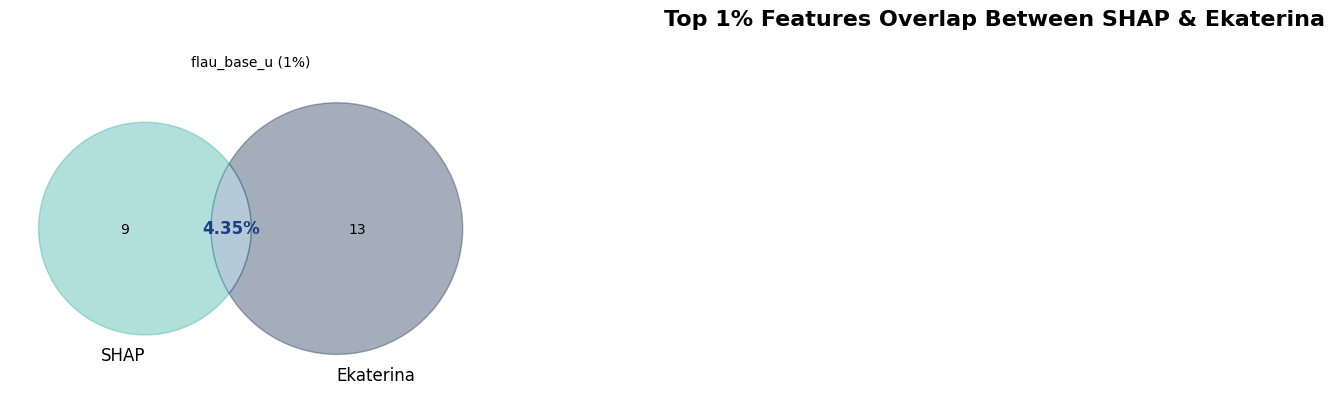

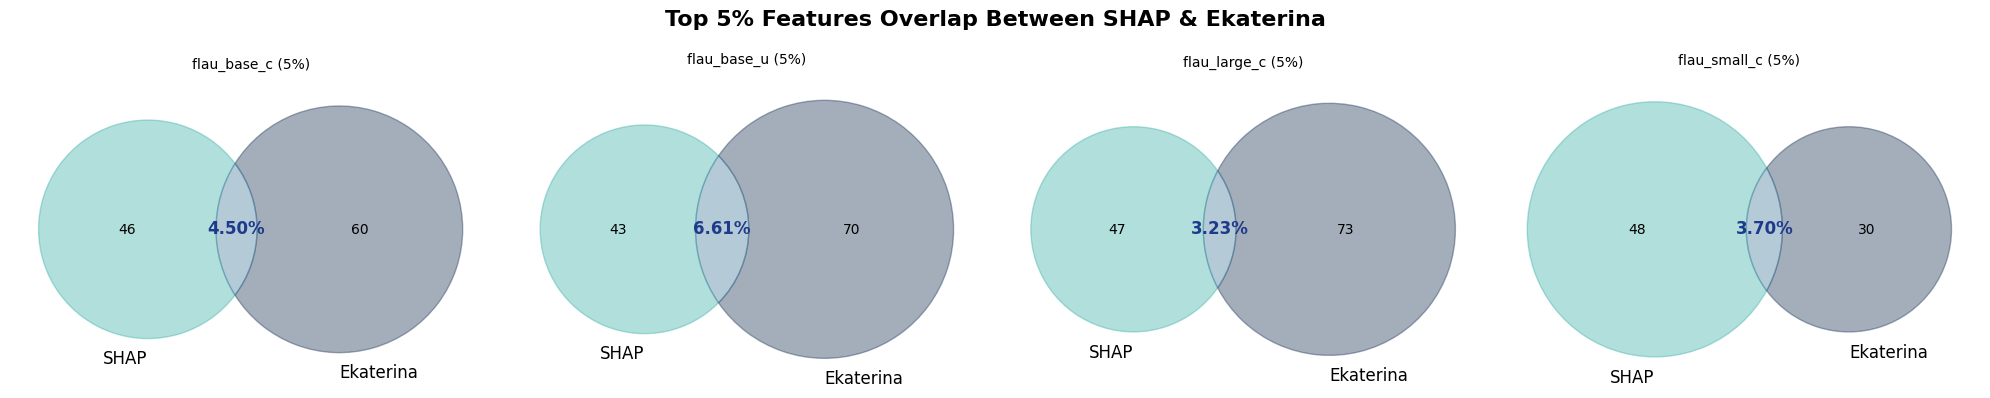

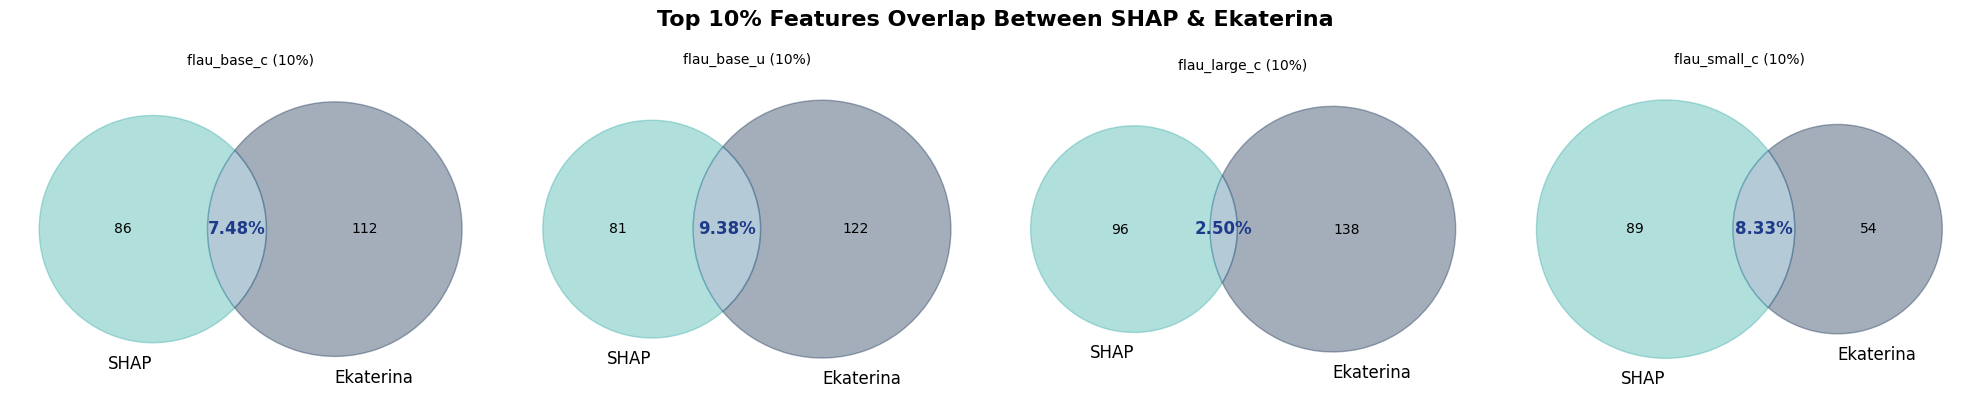

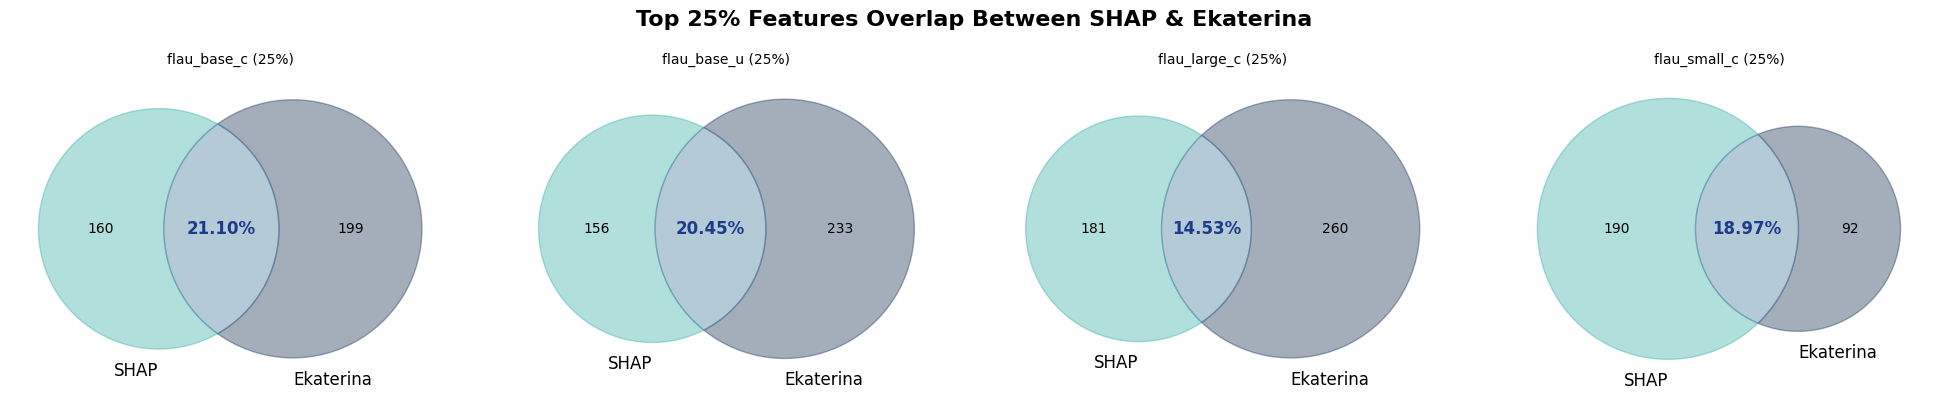

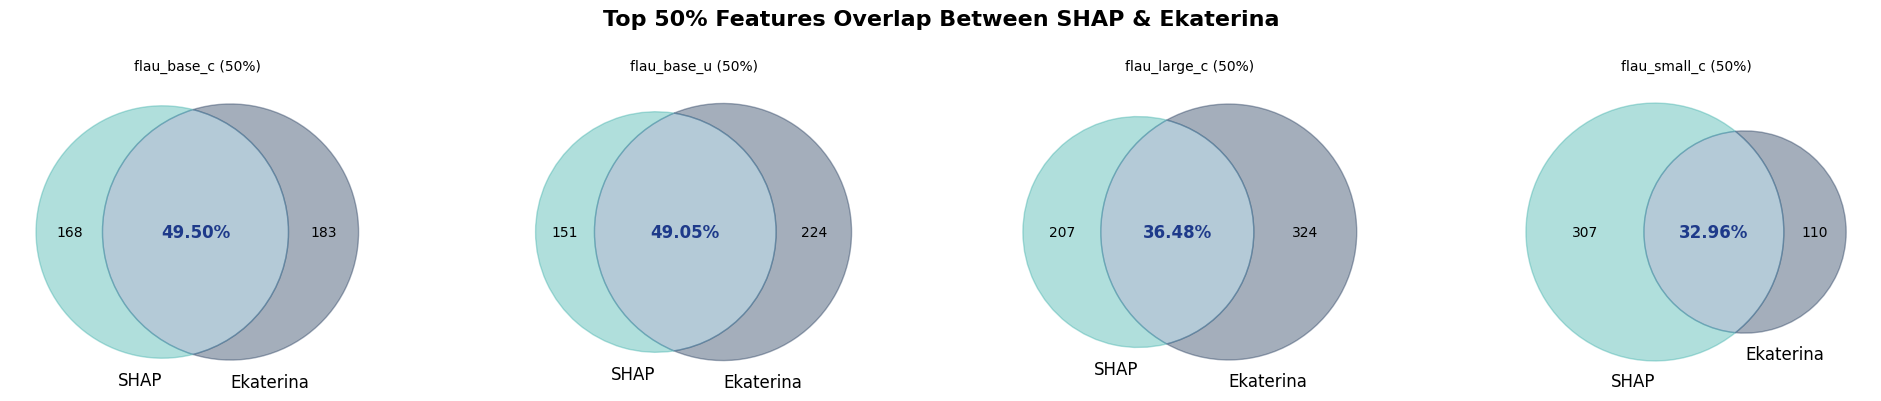

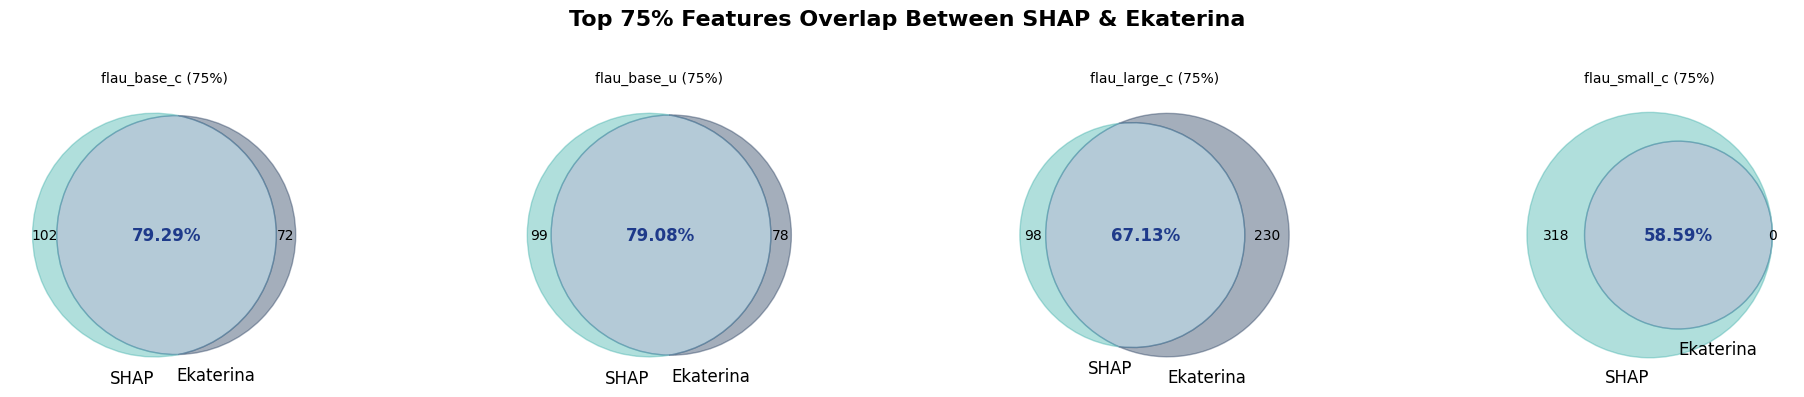

In [18]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import math

# Filter the overlap_df to remove rows with empty 'Common Features'
filtered_overlap_df = overlap_df[overlap_df['Common Features'].astype(str) != '[]']

# Get unique percentage levels from the 'Top Percentage' column
percentage_levels = sorted(filtered_overlap_df["Top Percentage"].unique(), key=lambda x: int(x.replace('%', '')))

# Define grid layout for visualization
cols = 4  # You can change this based on how many models you have per row

for percent in percentage_levels:
    df_filtered = filtered_overlap_df[filtered_overlap_df["Top Percentage"] == percent]
    num_models = len(df_filtered)
    rows = math.ceil(num_models / cols)

    # Create subplots
    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
    axes = axes.flatten()

    for idx, (_, row) in enumerate(df_filtered.iterrows()):
        ax = axes[idx]

        shap_count = row["Total SHAP Features"]
        ek_count = row["Ekaterina Total Dimensions"]
        common_count = row["Common Features Count"]

        # Set values for Venn diagram
        only_shap = shap_count - common_count
        only_ek = ek_count - common_count

        venn = venn2(
            subsets=(only_shap, only_ek, common_count),
            set_labels=("SHAP", "Ekaterina"),
            ax=ax
        )

        # Customize colors
        if venn.get_patch_by_id('10'):
            venn.get_patch_by_id('10').set_color("#3aafa9")  # SHAP only
        if venn.get_patch_by_id('01'):
            venn.get_patch_by_id('01').set_color("#1d3557")  # Ekaterina only
        if venn.get_patch_by_id('11'):
            venn.get_patch_by_id('11').set_color("#457b9d")  # Intersection

        # Show overlap percentage
        overlap_pct = row["Overlap %"]
        if venn.get_label_by_id('11'):
            venn.get_label_by_id('11').set_text(f"{overlap_pct:.2f}%")
            venn.get_label_by_id('11').set_fontsize(12)
            venn.get_label_by_id('11').set_fontweight('bold')
            venn.get_label_by_id('11').set_color("#1e3a8a")

        ax.set_title(f"{row['Model']} ({percent})", fontsize=10)

    # Hide any extra subplots
    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])

    # Final formatting
    plt.suptitle(f"Top {percent} Features Overlap Between SHAP & Ekaterina", fontsize=16, fontweight="bold")
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


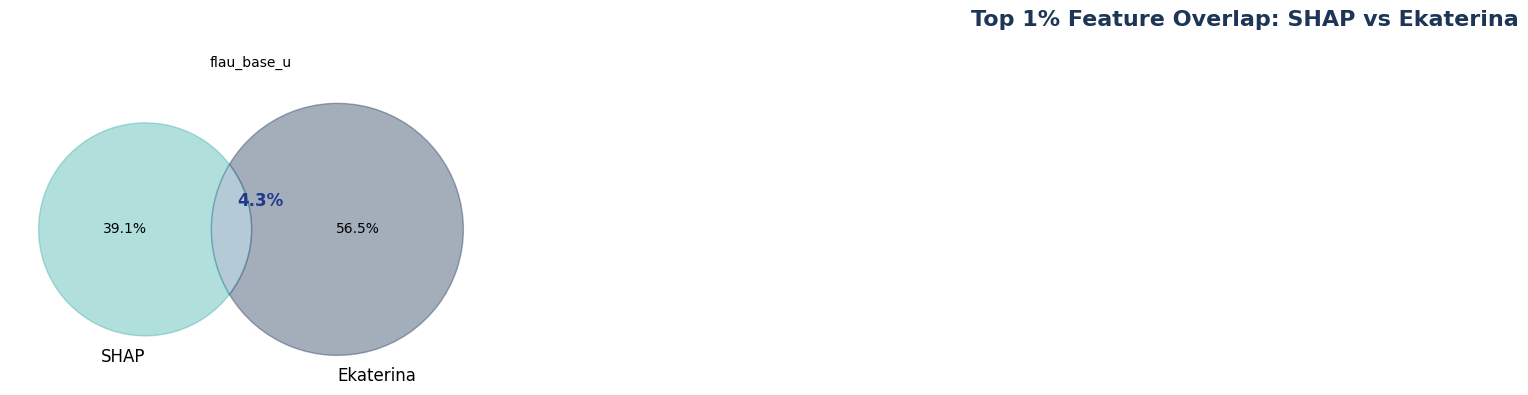

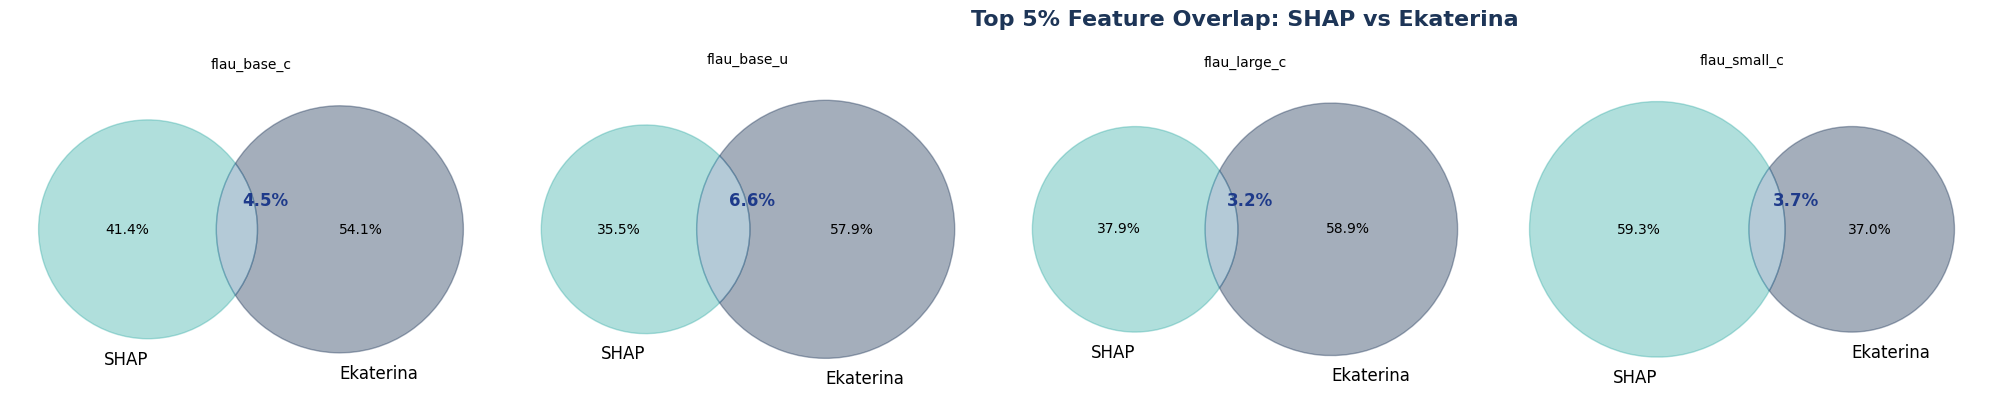

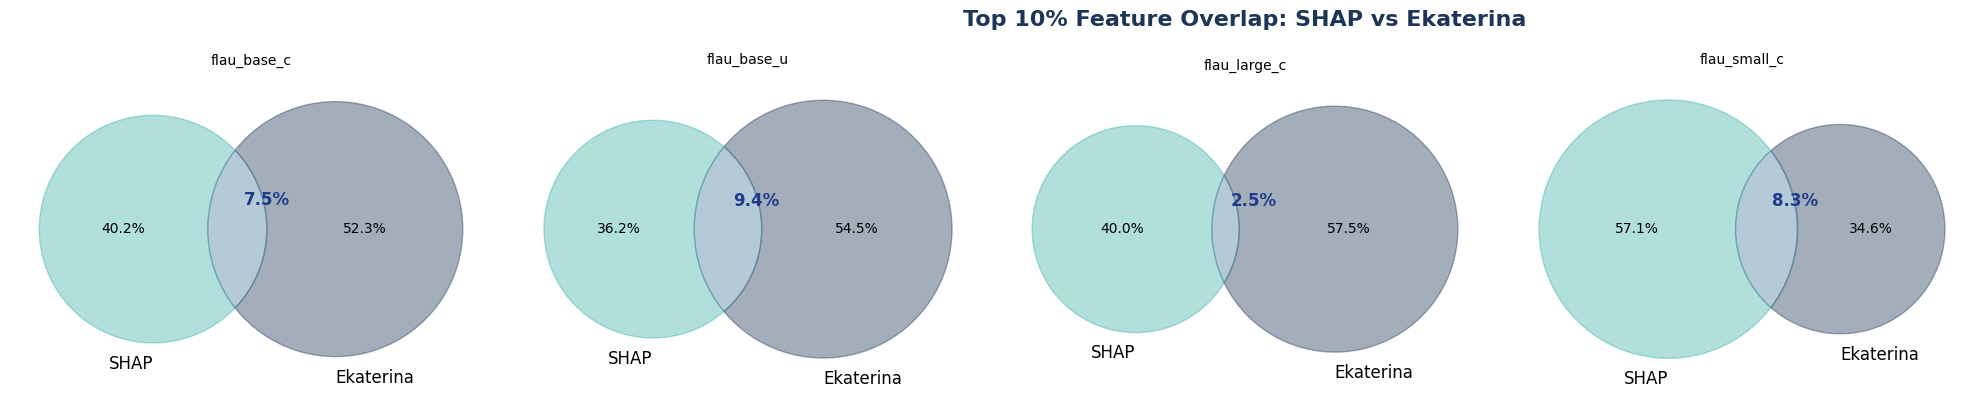

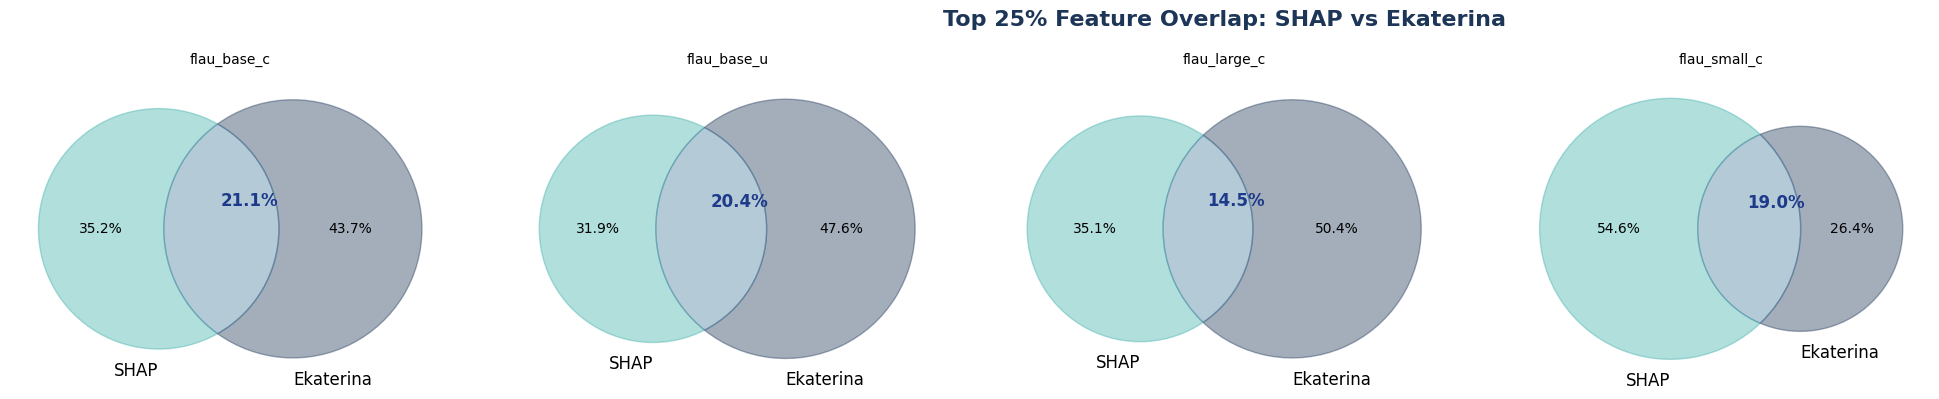

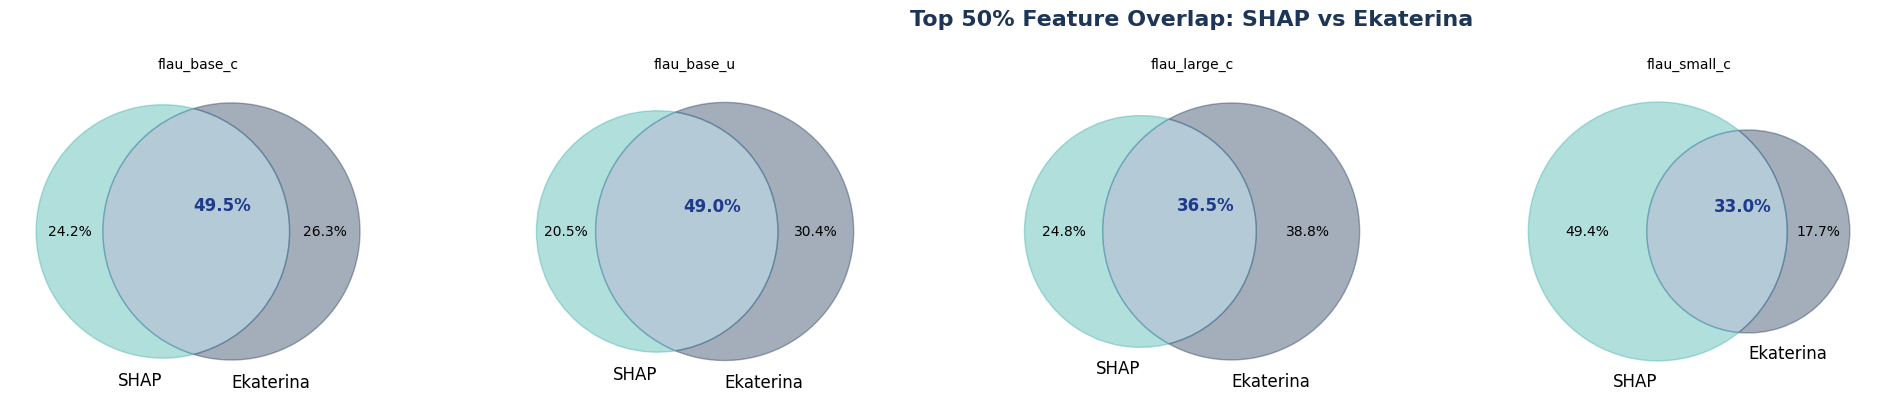

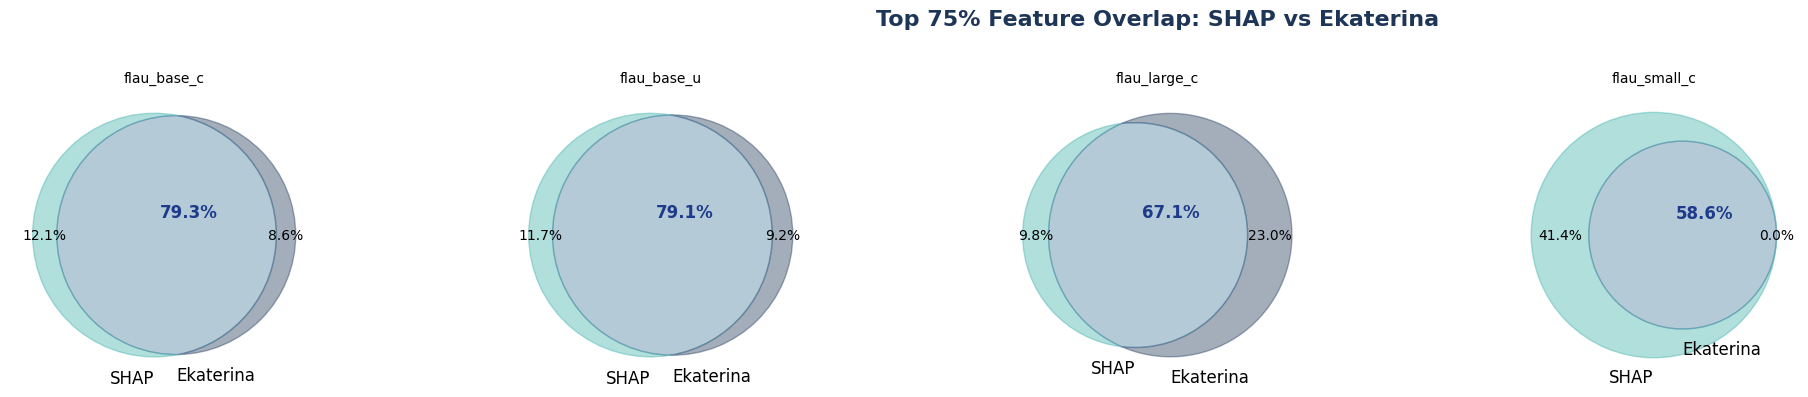

In [19]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import math

# Filter the overlap_df to remove rows with empty 'Common Features'
filtered_overlap_df = overlap_df[overlap_df['Common Features'].astype(str) != '[]']


# Get unique percentage levels from the 'Top Percentage' column
percentage_levels = sorted(filtered_overlap_df["Top Percentage"].unique(), key=lambda x: int(x.replace('%', '')))

# Define grid layout
cols = 5  # Models per row

for percent in percentage_levels:
    df_filtered = filtered_overlap_df[filtered_overlap_df["Top Percentage"] == percent]
    num_models = len(df_filtered)
    rows = math.ceil(num_models / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
    axes = axes.flatten()

    for idx, (_, row) in enumerate(df_filtered.iterrows()):
        ax = axes[idx]

        # Get raw counts
        shap_total = row["Total SHAP Features"]
        ek_total = row["Ekaterina Total Dimensions"]
        common = row["Common Features Count"]

        # Convert to set logic: a = only SHAP, b = only EK, ab = intersection
        only_shap = shap_total - common
        only_ek = ek_total - common
        total = only_shap + only_ek + common

        # Convert to percentages of total
        only_shap_pct = (only_shap / total) * 100 if total > 0 else 0
        only_ek_pct = (only_ek / total) * 100 if total > 0 else 0
        common_pct = (common / total) * 100 if total > 0 else 0

        # Draw the Venn diagram
        venn = venn2(
            subsets=(only_shap_pct, only_ek_pct, common_pct),
            set_labels=("SHAP", "Ekaterina"),
            ax=ax
        )

        # Set custom colors
        if venn.get_patch_by_id('10'):
            venn.get_patch_by_id('10').set_color("#3aafa9")  # SHAP only
        if venn.get_patch_by_id('01'):
            venn.get_patch_by_id('01').set_color("#1d3557")  # Ekaterina only
        if venn.get_patch_by_id('11'):
            venn.get_patch_by_id('11').set_color("#457b9d")  # Intersection

        # Add percentage text to each section
        if venn.get_label_by_id('10'):
            venn.get_label_by_id('10').set_text(f'{only_shap_pct:.1f}%')
        if venn.get_label_by_id('01'):
            venn.get_label_by_id('01').set_text(f'{only_ek_pct:.1f}%')
        if venn.get_label_by_id('11'):
            venn.get_label_by_id('11').set_text(f'{common_pct:.1f}%')
            venn.get_label_by_id('11').set_fontsize(12)
            venn.get_label_by_id('11').set_fontweight('bold')
            venn.get_label_by_id('11').set_color('#1e3a8a')
            # Optional: adjust position of overlap label
            x, y = venn.get_label_by_id('11').get_position()
            venn.get_label_by_id('11').set_position((x + 0.1, y + 0.1))

        ax.set_title(f"{row['Model']}", fontsize=10)

    # Hide extra subplots
    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle(f"Top {percent} Feature Overlap: SHAP vs Ekaterina", fontsize=16, fontweight="bold", color="#1d3557")
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()



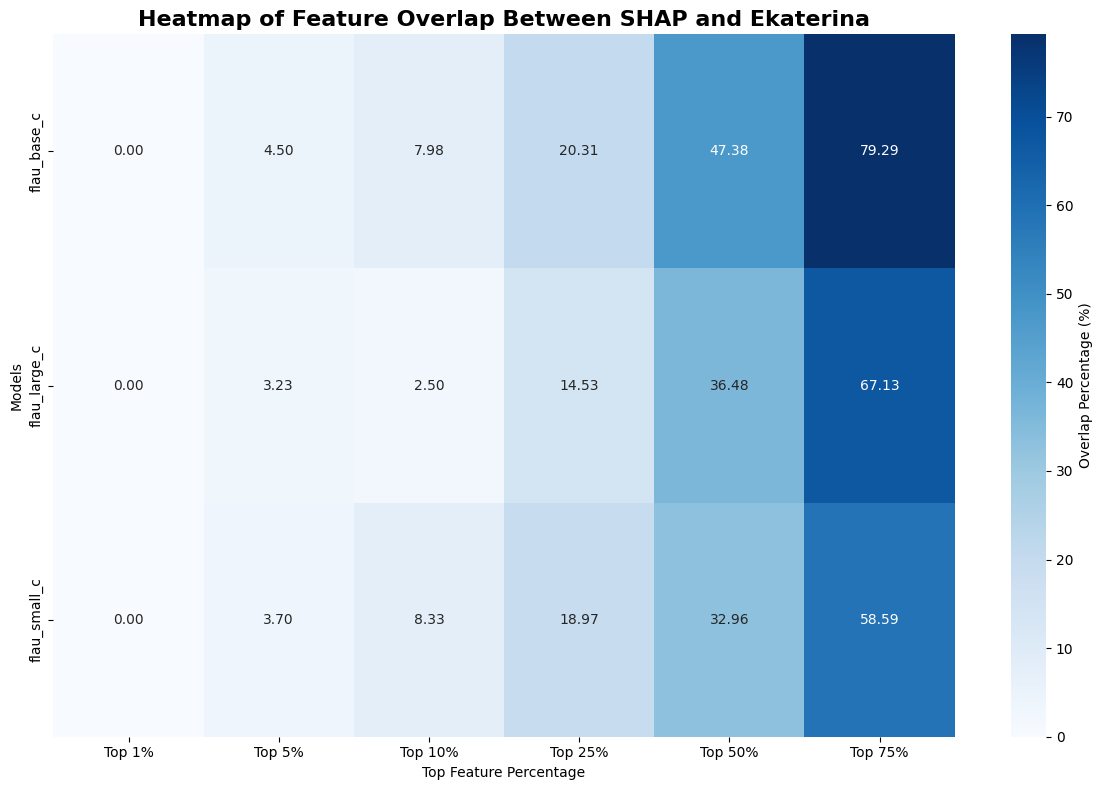

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filter out rows where there are no common features
overlap_df_filtered = overlap_df[overlap_df['Common Features'].astype(str) != '']

# Create dictionary to store overlap percentage per model per percentage level
overlap_percentage_per_model = {}

# Fill the dictionary from the filtered DataFrame
for _, row in overlap_df_filtered.iterrows():
    model = row['Model']
    percent = int(str(row['Top Percentage']).replace('%', ''))  # Ensure it's an int
    shap_total = row['Total SHAP Features']
    ekat_total = row['Ekaterina Total Dimensions']
    common = row['Common Features Count']

    # Calculate percentage of overlap with respect to SHAP + Ekaterina
    total_union = shap_total + ekat_total - common
    if total_union > 0:
        overlap_percent = (common / total_union) * 100
    else:
        overlap_percent = 0.0

    if model not in overlap_percentage_per_model:
        overlap_percentage_per_model[model] = {}
    overlap_percentage_per_model[model][percent] = overlap_percent

# Prepare data for heatmap
heatmap_data = []
models = sorted(overlap_percentage_per_model.keys())
percentage_levels = [1, 5, 10, 25, 50, 75]  # Use the consistent percent values

for model in models:
    row = []
    for percent in percentage_levels:
        # Fill missing percentages with 0.0 if not available
        row.append(overlap_percentage_per_model.get(model, {}).get(percent, 0.0))
    heatmap_data.append(row)

# Create a DataFrame for the heatmap
heatmap_df = pd.DataFrame(heatmap_data, index=models, columns=[f"Top {p}%" for p in percentage_levels])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_df, annot=True, fmt=".2f", cmap="Blues", cbar_kws={'label': 'Overlap Percentage (%)'})
plt.title("Heatmap of Feature Overlap Between SHAP and Ekaterina", fontsize=16, fontweight="bold")
plt.xlabel("Top Feature Percentage")
plt.ylabel("Models")
plt.tight_layout()
plt.show()


ANALYSIS

- Overlap percentages grow as we include more features (from Top 1% to Top 75%).
- flau_base_c shows the highest overlaps across all levels.At Top 75%, it hits 79.29% overlap.Even at Top 25%, it reaches 20.31%, suggesting early convergence
-  flau_small_c:Starts slow at low percentages but catches up:Only 8.33% overlap at Top 10%.Reaches 58.59% at Top 75%.
- Indicates Ekaterina and SHAP agree more on less important features in this model.


- Percent-level implications:
Top 25% and up is where real overlap begins to stabilize for all models.

Top 1% and 5% show very little overlap — so critical feature selection is model-dependent.



